Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Importing Dataset

In [2]:
file = pd.read_csv('Iris.csv', index_col = 0)
file.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
file.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Exploratory Data Analysis (EDA)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


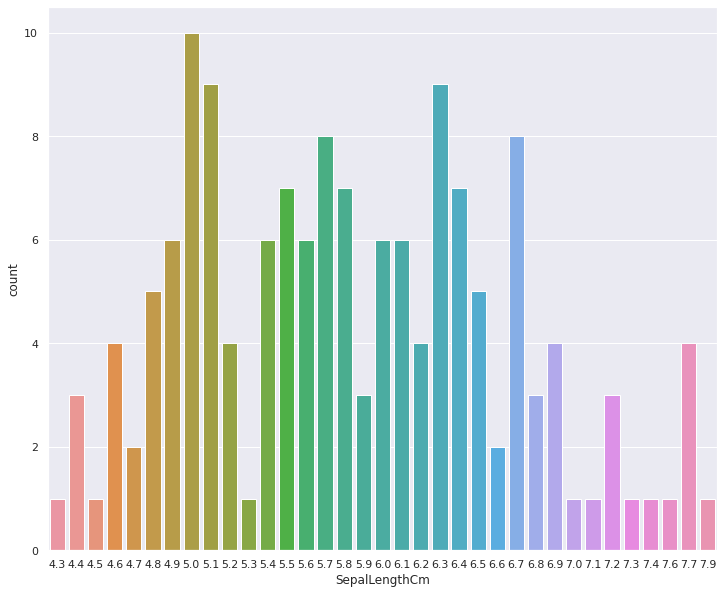

In [4]:
sns.set()
plt.figure(figsize = (12,10))
sns.countplot('SepalLengthCm', data = file)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


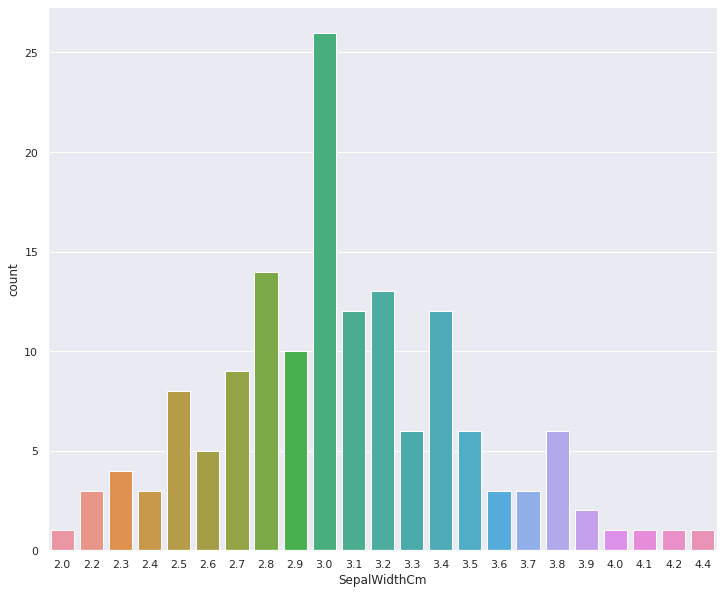

In [5]:
plt.figure(figsize = (12,10))
sns.countplot('SepalWidthCm', data = file)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


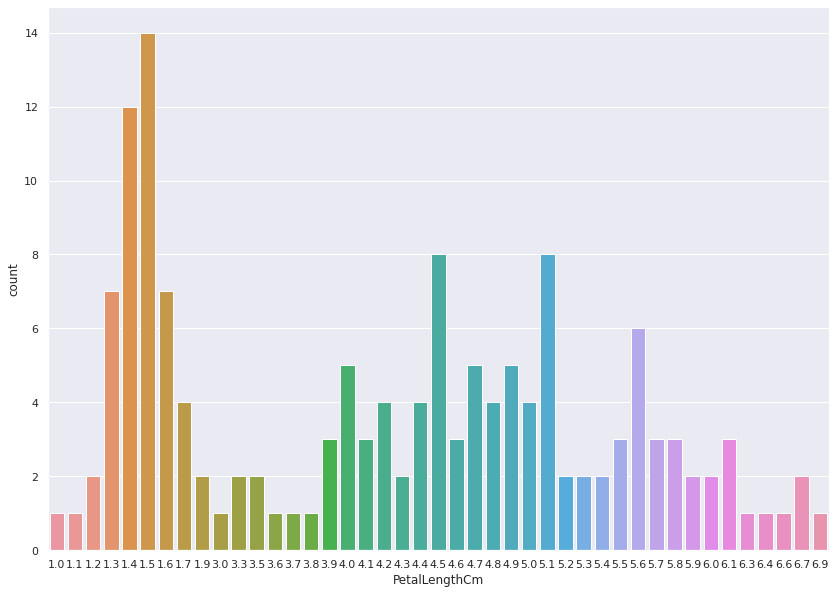

In [6]:
plt.figure(figsize = (14,10))
sns.countplot('PetalLengthCm', data = file)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


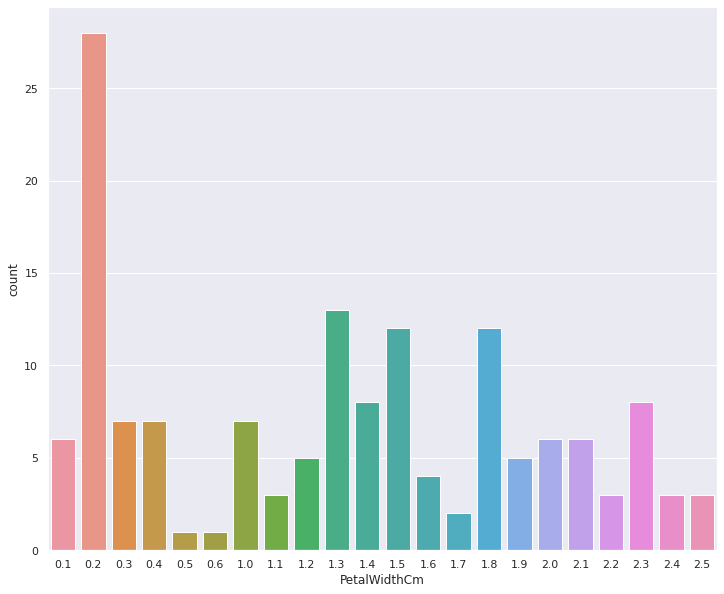

In [7]:
plt.figure(figsize = (12,10))
sns.countplot('PetalWidthCm', data = file)
plt.show()

In [8]:
file['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


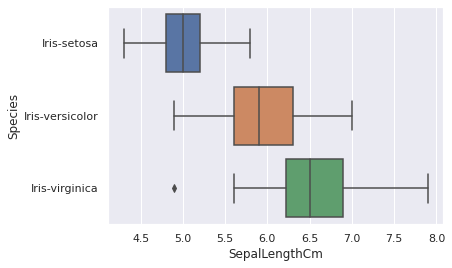

In [9]:
sns.boxplot('SepalLengthCm','Species',data = file)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


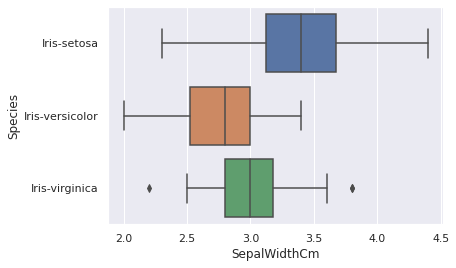

In [10]:
sns.boxplot('SepalWidthCm','Species',data = file)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


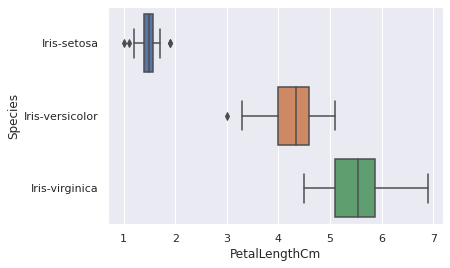

In [11]:
sns.boxplot('PetalLengthCm','Species',data = file)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


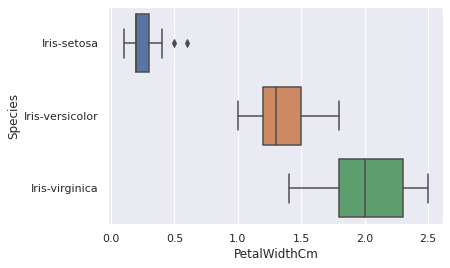

In [12]:
sns.boxplot('PetalWidthCm','Species',data = file)

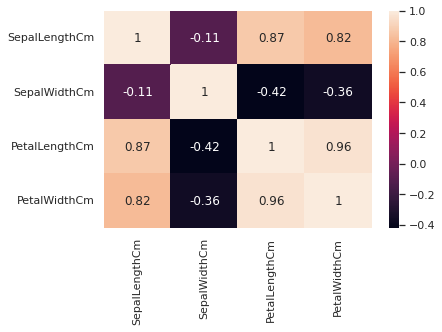

In [13]:
sns.heatmap(file.corr(),annot = True)

Getting the Values

In [14]:
X = file.iloc[:,:-1].values
Y = file.iloc[:,-1].values

Splitting into Test & Train Datasets

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 365, stratify = Y)

In [16]:
np.unique(Y_train,return_counts = True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([40, 40, 40]))

In [17]:
np.unique(Y_test,return_counts = True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([10, 10, 10]))

Feature Scaling

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Hyperparameter tuning using GridSearch

In [19]:
classifier = DecisionTreeClassifier()
grid = GridSearchCV(estimator = classifier, param_grid = {'ccp_alpha':[0.0001,0.001,0.01,0.1,1]},
                    scoring = 'precision', n_jobs = -1)
grid.fit(X_train,Y_train)
grid.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  category=UserWarning,


{'ccp_alpha': 0.0001}

Final Decision Tree Model

In [20]:
classifier = DecisionTreeClassifier(ccp_alpha = 0.0001)
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0001)

Plotting Decision Tree

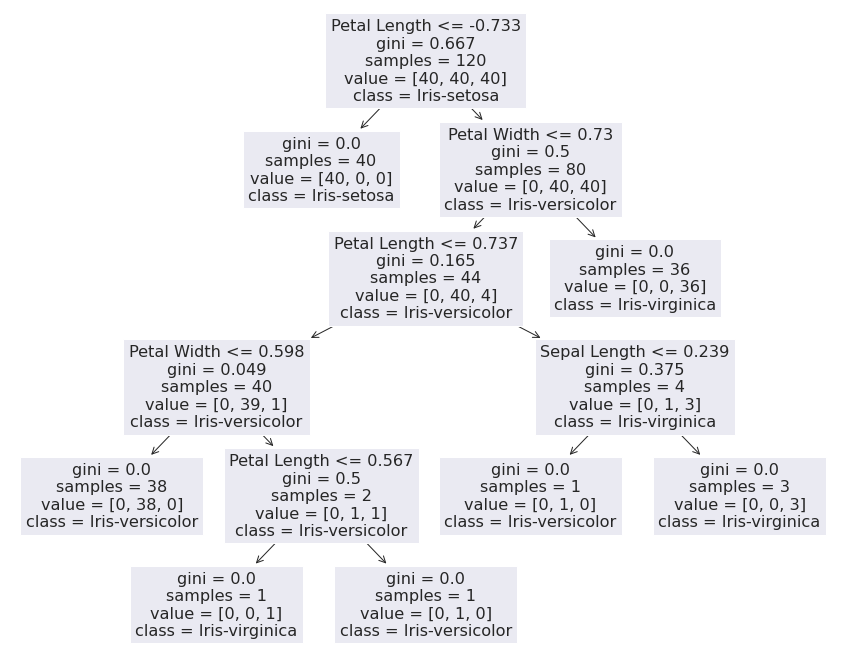

In [21]:
plt.figure(figsize = (15,12))
plt.title('Decision Tree')
plot_tree(classifier,feature_names = ['Sepal Length','Sepal Width','Petal Length','Petal Width'],
          class_names=np.unique(Y_train))
plt.show()

Evaluating the Model

In [22]:
Y_pred = classifier.predict(X_test)
print(f'Accuracy Score: {accuracy_score(Y_test,Y_pred)}')


Accuracy Score: 0.9333333333333333


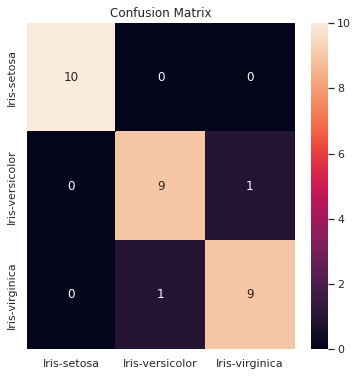

In [23]:
plt.figure(figsize = (6,6))
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot = True, xticklabels = np.unique(Y_test), yticklabels = np.unique(Y_test))
plt.show()

In [24]:
print(classification_report(Y_test,Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

